# 20K-0355
# Lab Class Tasks

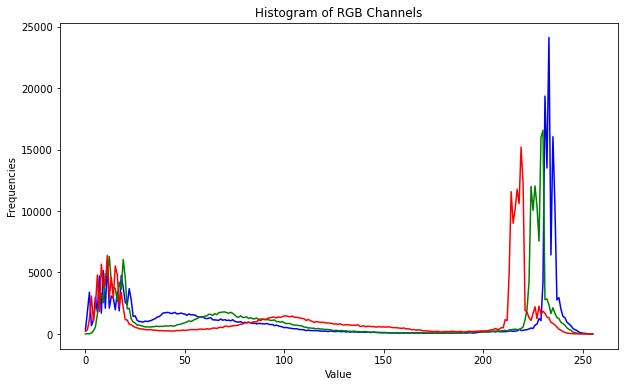

In [77]:
from skimage import feature
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r'F:\Uni Work\CV Lab\Lab 5\class tasks\harvey.jpg')
image = cv2.resize(image, (450, 650))
b,g,r = cv2.split(image)
  

hb = cv2.calcHist([b], [0], None, [256], [0, 256])
hg = cv2.calcHist([g], [0], None, [256], [0, 256])
hr = cv2.calcHist([r], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.title('Histogram of RGB Channels')
plt.xlabel('Value')
plt.ylabel('Frequencies')

plt.plot(hb, color='blue', label='Blue')
plt.plot(hg, color='green', label='Green')
plt.plot(hr, color='red', label='Red')

plt.show()

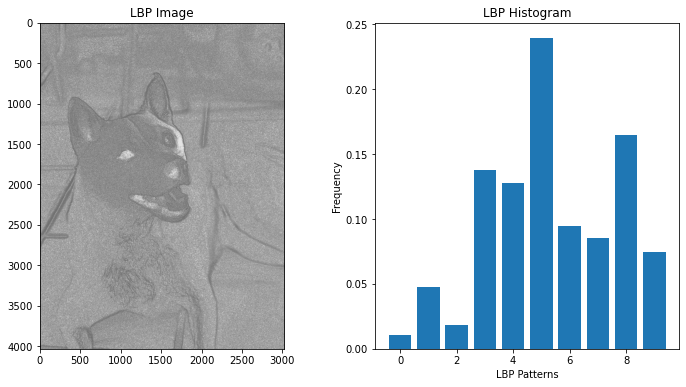

LBP Feature Vector:
[0.01063926 0.04769114 0.01808465 0.13758394 0.12784267 0.23931326
 0.09454318 0.08548625 0.16460741 0.07420825]


In [79]:
from skimage import feature
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read an image (grayscale)
image = cv2.imread(r'F:\Uni Work\CV Lab\Lab 5\class tasks\image1.jpg', cv2.IMREAD_GRAYSCALE)

# Compute LBP features
radius = 1  # Radius of the circular neighborhood
n_points = 8 * radius  # Number of neighboring pixels to consider
lbp_image = feature.local_binary_pattern(image, n_points, radius, method='uniform')

# Calculate the LBP histogram
hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

# Normalize the histogram
hist = hist.astype("float")
hist /= (hist.sum() + 1e-6)

# Display the LBP image and histogram
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(lbp_image, cmap='gray')
plt.title('LBP Image')

plt.subplot(122)
plt.bar(range(0, n_points + 2), hist)
plt.title('LBP Histogram')
plt.xlabel('LBP Patterns')
plt.ylabel('Frequency')
plt.show()

# Print the LBP feature vector
print("LBP Feature Vector:")
print(hist)


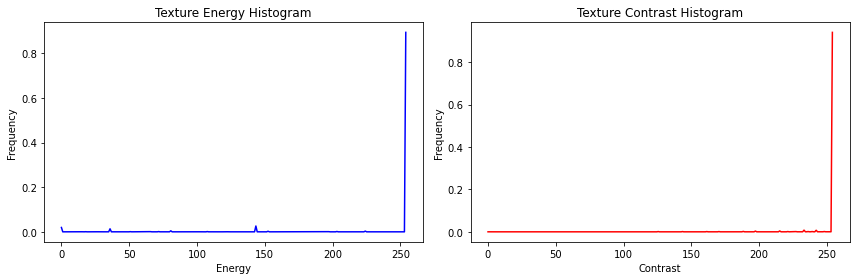

In [86]:
# Read an image (grayscale)
image = cv2.imread(r'F:\Uni Work\CV Lab\Lab 5\class tasks\rock.jpg', cv2.IMREAD_GRAYSCALE)

# Define the neighborhood size (e.g., 3x3 window)
neighborhood_size = 3

# Calculate texture energy and contrast using OpenCV filter2D
energy = cv2.filter2D(image ** 2, -1, np.ones((neighborhood_size, neighborhood_size)))
contrast = cv2.filter2D(image, -1, np.ones((neighborhood_size, neighborhood_size)))

# Compute histograms for texture energy and contrast
energy_histogram, energy_bins = np.histogram(energy, bins=256, range=(0, energy.max()))
contrast_histogram, contrast_bins = np.histogram(contrast, bins=256, range=(0, contrast.max()))

# Normalize histograms (optional)
energy_histogram = energy_histogram / energy_histogram.sum()
contrast_histogram = contrast_histogram / contrast_histogram.sum()

# Display the histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(energy_bins[:-1], energy_histogram, color='b')
plt.title("Texture Energy Histogram")
plt.xlabel("Energy")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.plot(contrast_bins[:-1], contrast_histogram, color='r')
plt.title("Texture Contrast Histogram")
plt.xlabel("Contrast")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ---------------------------

# Lab Tasks

In [1]:
#SHI TOMASI LAB TASK

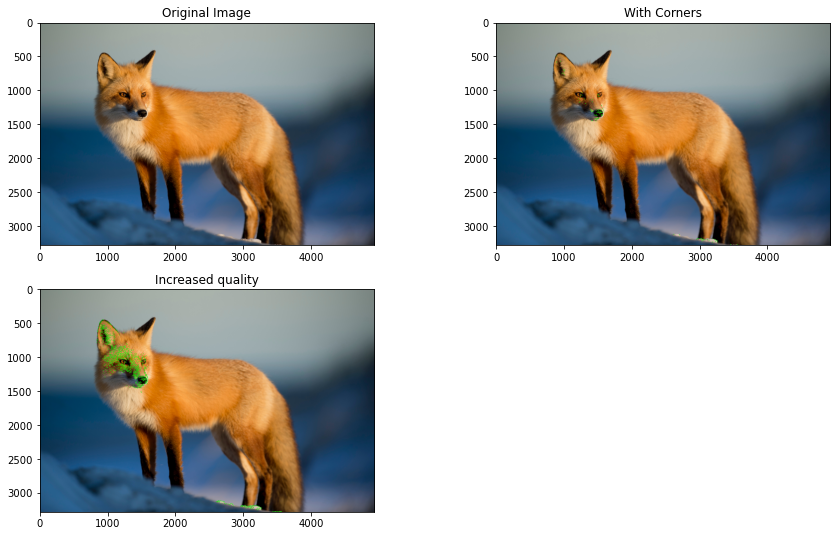

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))

image_path = r'F:\Uni Work\CV Lab\Lab 5\image1.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

corners = cv2.goodFeaturesToTrack(gray_image, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int64(corners_100)

img_corners = image.copy()
for i in corners:
    x, y = i.ravel()
    cv2.circle(img_corners, (x, y), 5, (0, 255, 0), -1)
    
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB))
plt.title('With Corners')

corners = cv2.goodFeaturesToTrack(gray_image, maxCorners=1000, qualityLevel=0.01, minDistance=10)
corners = np.int64(corners)

img_corners = image.copy()
for i in corners:
    x, y = i.ravel()
    cv2.circle(img_corners, (x, y), 5, (0, 255, 0), -1)

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img_corners, cv2.COLOR_BGR2RGB))
plt.title('Increased quality')
plt.show()

In [22]:
#MAMMOGRAPHY TASK

1. Edge Detection for Tumor Detection in Mammograms:

- Use edge detection algorithms (Canny, Sobel) to identify intensity changes, usually in tunmors
- Convert the edge map into a binary image through thresholding
- Refine edges
- Extract specific regions from the images
- Perform feature extraction
- Classify the region of interests
- Use post processing to refine tumor detection results


2. Possible feature extraction technique: Texture Analysis

- Texture analysis characterizes spatial pixel value arrangements
- Uses methods like GLCM, GLRLM, Haralick, Gabor
- Captures small/minute variations in tissue patterns, which can be helpful
- It helps the edge detection results by providing information about internal texture
- Combined edge and texture analysis improves detection accuracy and reduces false positives

In [23]:
#HARRIS CORNER

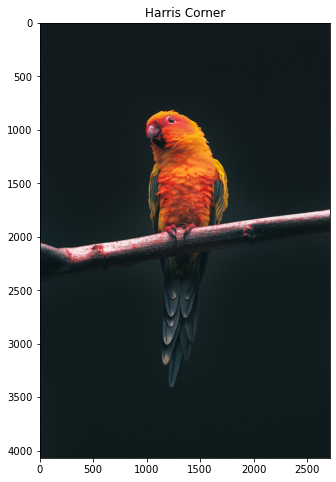

In [44]:
image_path = r'F:\Uni Work\CV Lab\Lab 5\image2.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

block_size = 2
k = 0.04

corner_scores = cv2.cornerHarris(gray_image, block_size, 3, k)

threshold = 0.0001 * corner_scores.max()
corners = np.where(corner_scores > threshold)

corner_image = image.copy()
corner_image[corners1] = [0, 0, 255]

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner')
plt.show()


In [45]:
#VIDEO EDGE

In [51]:
import numpy as np

#for optimization
max_corners = 1000
quality = 0.01

video_path = r'F:\Uni Work\CV Lab\Lab 5\video1.mp4'
cap = cv2.VideoCapture(video_path)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    corners = cv2.goodFeaturesToTrack(gray_frame, max_corners, quality, 7)
    
    corners = np.int0(corners)
    
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(frame, (x, y), 5, (0, 255, 0), -1)
    
    cv2.imshow('shi tomaso edge detection', frame)
    
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


C:\Users\USMAN\AppData\Local\Temp\ipykernel_17520\1916739740.py:20: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


In [52]:
#MULTIPLE IMAGE SHI TOMASI

C:\Users\USMAN\AppData\Local\Temp\ipykernel_17520\1437826245.py:14: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners1 = np.int0(corners1)
C:\Users\USMAN\AppData\Local\Temp\ipykernel_17520\1437826245.py:15: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners2 = np.int0(corners2)


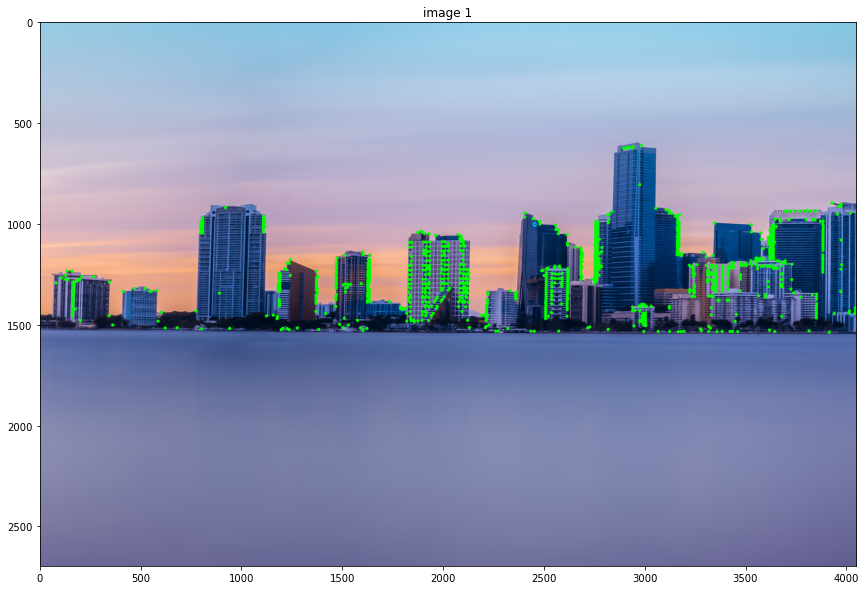

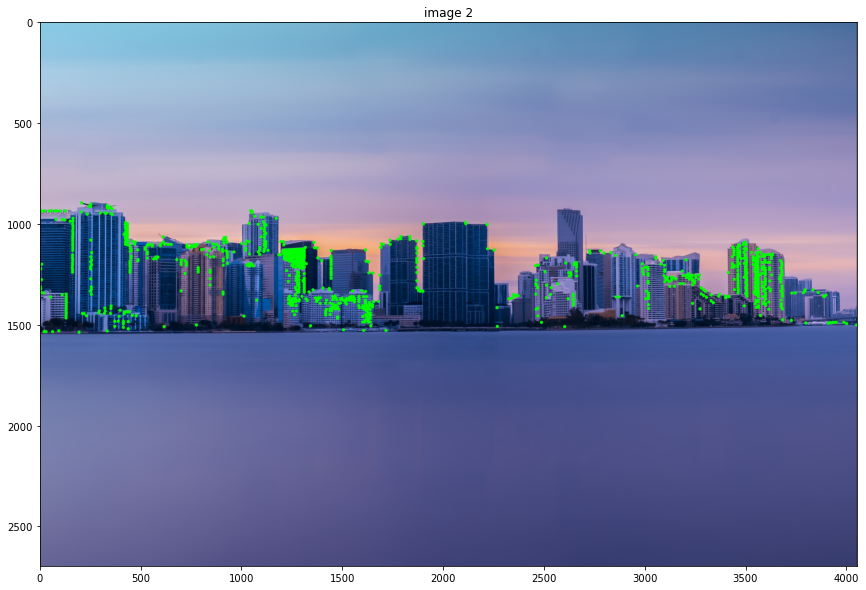

In [62]:
#optimization
max_corners = 1000
quality = 0.0001

image1 = cv2.imread(r'F:\Uni Work\CV Lab\Lab 5\image3.jpg')
image2 = cv2.imread(r'F:\Uni Work\CV Lab\Lab 5\image4.jpg')

gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

corners1 = cv2.goodFeaturesToTrack(gray_image1, max_corners, quality, 7)
corners2 = cv2.goodFeaturesToTrack(gray_image2, max_corners, quality, 7)

corners1 = np.int0(corners1)
corners2 = np.int0(corners2)


for corner in corners1:
    x, y = corner.ravel()
    cv2.circle(image1, (x, y), 8, (0, 255, 0), -1)

for corner in corners2:
    x, y = corner.ravel()
    cv2.circle(image2, (x, y), 8, (0, 255, 0), -1)

plt.figure(figsize=(18, 10))
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('image 1')

plt.figure(figsize=(18, 10))
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('image 2')

plt.show()

In [63]:
#LAST TASK

In [74]:
image1 = cv2.imread(r'F:\Uni Work\CV Lab\Lab 5\image5.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(r'F:\Uni Work\CV Lab\Lab 5\image6.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

kp1, descriptors1 = orb.detectAndCompute(image1, None)
kp2, descriptors2 = orb.detectAndCompute(image2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

matched_image = cv2.drawMatches(image1, kp1, image2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

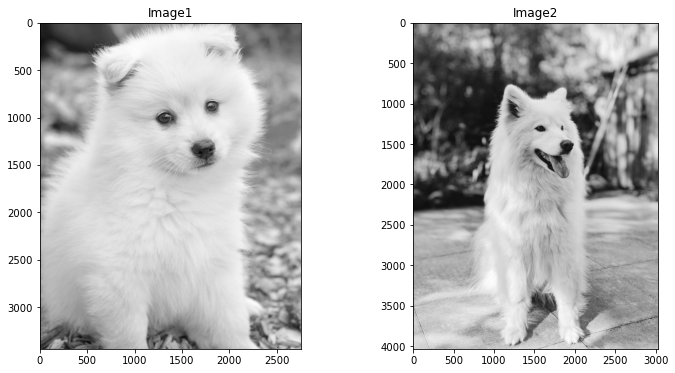

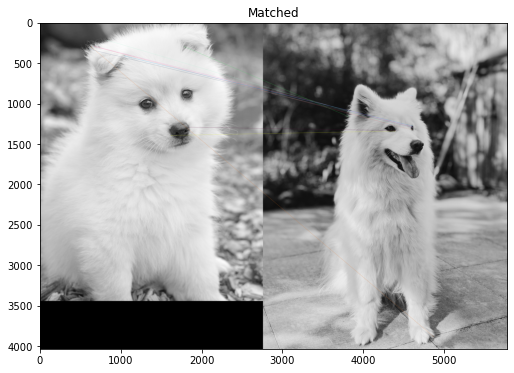

In [75]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Image1')

plt.subplot(1, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Image2')

plt.figure(figsize=(12, 6))
plt.imshow(matched_image)
plt.title('Matched')

plt.show()